In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!pip install streamlit pyngrok --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [3]:
!pip install pyngrok

In [4]:
%%writefile app.py
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import PIL

# Load model
model = load_model('vegetable_classifier_model.keras')

# Define class names (replace with your actual labels)
class_names = ['Beans', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli',
               'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber',
               'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# Streamlit UI
st.title("🥦 Vegetable Classifier")
st.write("Upload a vegetable image and the model will predict its type.")

uploaded_file = st.file_uploader("Upload Image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = PIL.Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image", use_column_width=True)

    img = image.resize((150, 150))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    st.success(f"✅ Prediction: **{predicted_class}**")

Writing app.py


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train_dir = '/content/drive/MyDrive/Vegetable_dataset/train'
val_dir = '/content/drive/MyDrive/Vegetable_dataset/validation'
test_dir = '/content/drive/MyDrive/Vegetable_dataset/test'

In [7]:
import os

print("Train classes:", os.listdir(train_dir))
print("Validation classes:", os.listdir(val_dir))
print("Test classes:", os.listdir(test_dir))

Train classes: ['Capsicum', 'Cauliflower', 'Radish', 'Pumpkin', 'Potato', 'Cabbage', 'Bottle_Gourd', 'Bitter_Gourd', 'Bean', 'Cucumber', 'Tomato', 'Broccoli', 'Papaya', 'Brinjal', 'Carrot']
Validation classes: ['Capsicum', 'Cucumber', 'Brinjal', 'Radish', 'Potato', 'Cauliflower', 'Bean', 'Broccoli', 'Cabbage', 'Pumpkin', 'Bitter_Gourd', 'Papaya', 'Carrot', 'Bottle_Gourd', 'Tomato']
Test classes: ['Pumpkin', 'Potato', 'Capsicum', 'Cucumber', 'Cabbage', 'Radish', 'Bean', 'Brinjal', 'Cauliflower', 'Broccoli', 'Bitter_Gourd', 'Bottle_Gourd', 'Carrot', 'Tomato', 'Papaya']


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image size and batch size
img_size = (150, 150)
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the datasets from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model again
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(15, activation='softmax')  # 15 = number of vegetable classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Recommended sizes:
img_height, img_width = 100, 100  # instead of 150x150
batch_size = 32  # or reduce to 16 if training is slow

In [11]:
class_names = list(train_generator.class_indices.keys())

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # prevents overfitting
    Dense(len(class_names), activation='softmax')
])

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import GlobalAveragePooling2D  # optional

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),  # Or: GlobalAveragePooling2D() to reduce dimensions automatically

    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')  # output layer
])

In [16]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,830,287 (18.43 MB)

 Trainable params: 4,830,287 (18.43 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 4791s 10s/step - accuracy: 0.2951 - loss: 2.0853 - val_accuracy: 0.7554 - val_loss: 0.7684
Epoch 2/10
  1/468 ━━━━━━━━━━━━━━━━━━━━ 13:34 2s/step - accuracy: 0.6250 - loss: 1.1549

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


468/468 ━━━━━━━━━━━━━━━━━━━━ 61s 127ms/step - accuracy: 0.6250 - loss: 1.1549 - val_accuracy: 0.7564 - val_loss: 0.7672
Epoch 3/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 889s 2s/step - accuracy: 0.6669 - loss: 0.9916 - val_accuracy: 0.8676 - val_loss: 0.4616
Epoch 4/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 83s 173ms/step - accuracy: 0.7812 - loss: 0.7014 - val_accuracy: 0.8599 - val_loss: 0.4843
Epoch 5/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 907s 2s/step - accuracy: 0.7796 - loss: 0.6814 - val_accuracy: 0.8831 - val_loss: 0.4190
Epoch 6/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 82s 170ms/step - accuracy: 0.8750 - loss: 0.4178 - val_accuracy: 0.8864 - val_loss: 0.4062
Epoch 7/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 915s 2s/step - accuracy: 0.8343 - loss: 0.5043 - val_accuracy: 0.9207 - val_loss: 0.2815
Epoch 8/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 83s 175ms/step - accuracy: 0.8438 - loss: 0.4811 - val_accuracy: 0.9170 - val_loss: 0.2808
Epoch 9/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 982s 2s/step - accuracy: 0.8676 - loss: 0.3985 - val_accurac

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"📉 Test Loss: {test_loss:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 779s 8s/step - accuracy: 0.9298 - loss: 0.2195
✅ Test Accuracy: 92.23%
📉 Test Loss: 0.2492


In [20]:
model.save("vegetable_classifier_model.keras")


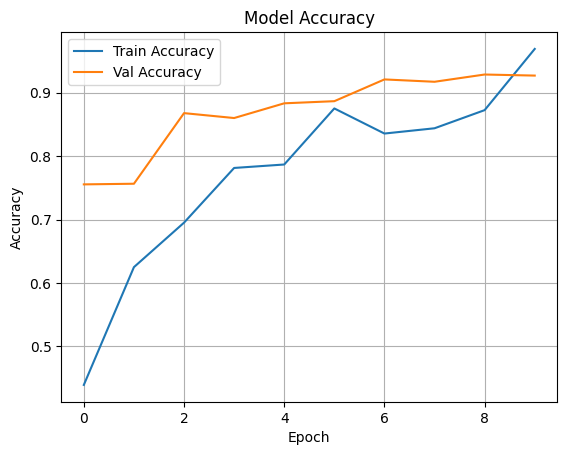

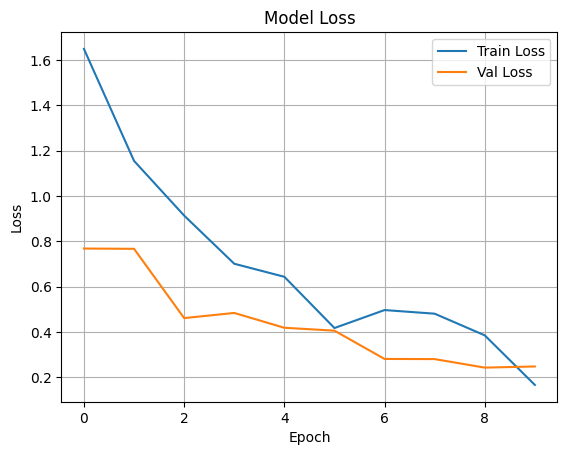

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
from google.colab import files
uploaded = files.upload()

Saving gg.jpeg to gg.jpeg


In [23]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os

# Automatically get the uploaded file name
file_name = next(iter(uploaded))

# Load and preprocess the image
img = load_img(file_name, target_size=(150, 150))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction[0])
predicted_class = class_names[predicted_class_index]

print(f"✅ Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
✅ Predicted Class: Cabbage


In [24]:
from tensorflow.keras.models import load_model

try:
    model = load_model("vegetable_classifier_model.keras")
    print("✅ Model loaded successfully!")
except Exception as e:
    print("❌ Error loading model:", e)

✅ Model loaded successfully!


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,490,863 (55.28 MB)

 Trainable params: 4,830,287 (18.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,660,576 (36.85 MB)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

: 

In [ ]:
model = load_model('vegetable_classifier_model.keras')

: 